In [2]:
import numpy as np
#import pickle
import pickle5 as pickle
import matplotlib.pyplot as plt

In [13]:
dataset = 'whas'

In [14]:
with open('results/'+dataset+'/random-small.pickle', 'rb') as handle:
    random = pickle.load(handle)

with open('results/'+dataset+'/bald-small.pickle', 'rb') as handle:
    bald = pickle.load(handle)

with open('results/'+dataset+'/cbald-small.pickle', 'rb') as handle:
    cbald = pickle.load(handle)

with open('results/'+dataset+'/duobald-small.pickle', 'rb') as handle:
    duobald = pickle.load(handle)
    
with open('results/'+dataset+'/avg_bald-small.pickle', 'rb') as handle:
    avg = pickle.load(handle)

with open('results/'+dataset+'/classbald-small.pickle', 'rb') as handle:
    classbald = pickle.load(handle)

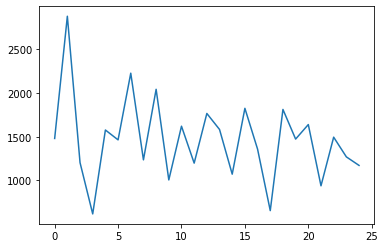

In [15]:
plt.plot(duobald['model_perf'][:,0])


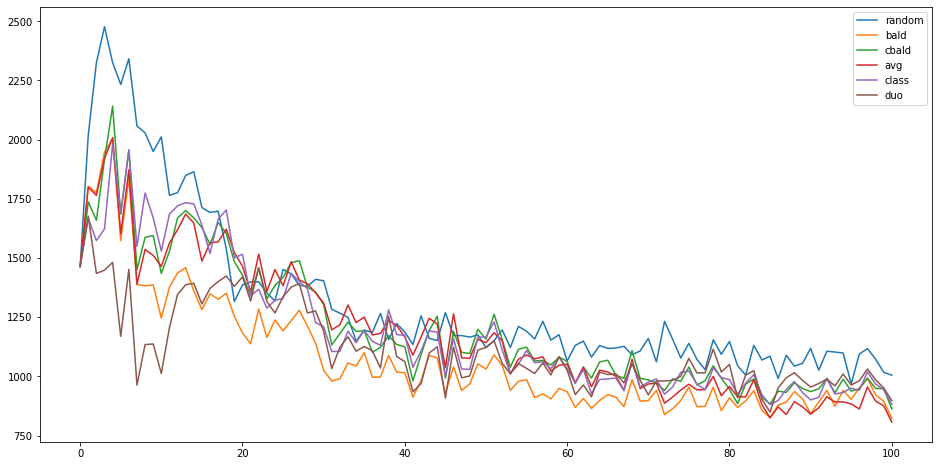

In [16]:
plt.figure(figsize=(16,8))
plt.plot(np.mean(random['model_perf'],axis=0), label='random')
plt.plot(np.mean(bald['model_perf'],axis=0), label='bald')
plt.plot(np.mean(cbald['model_perf'],axis=0),label='cbald')
plt.plot(np.mean(avg['model_perf'],axis=0),label='avg')
plt.plot(np.mean(classbald['model_perf'],axis=0),label='class')
plt.plot(np.mean(duobald['model_perf'],axis=0), label='duo')


#plt.fill_between(np.arange(duobald['model_perf'].shape[-1]), y1 = np.mean(duobald['model_perf'], axis=0)-np.std(duobald['model_perf'], axis=0),
#                                                    y2 = np.mean(duobald['model_perf'], axis=0)+np.std(duobald['model_perf'], axis=0),alpha=0.25)

plt.legend()
#plt.plot(np.mean(cbald_m['model_perf'],axis=0))


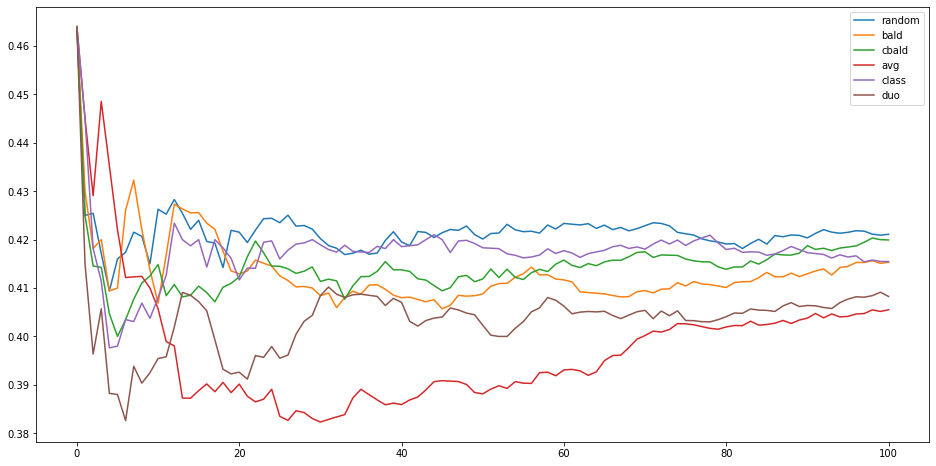

In [14]:
plt.figure(figsize=(16,8))
plt.plot(np.mean(random['censored'],axis=0), label='random')
plt.plot(np.mean(bald['censored'],axis=0), label='bald')
plt.plot(np.mean(cbald['censored'],axis=0),label='cbald')
plt.plot(np.mean(avg['censored'],axis=0),label='avg')
plt.plot(np.mean(classbald['censored'],axis=0),label='class')
plt.plot(np.mean(duobald['censored'],axis=0), label='duo')
plt.legend()
#plt.plot(np.mean(cbald_m['model_perf'],axis=0))

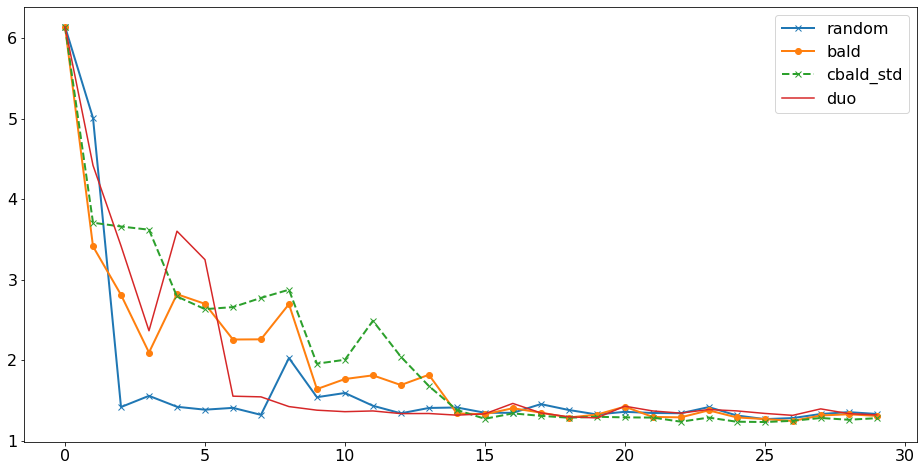

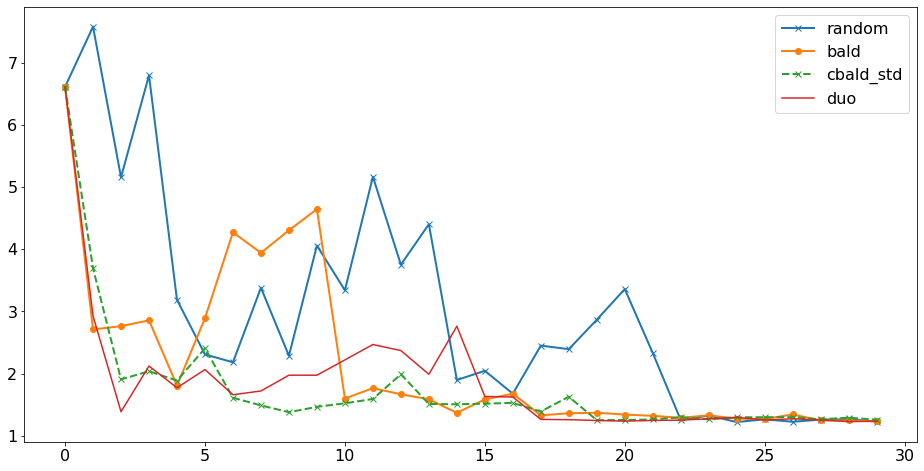

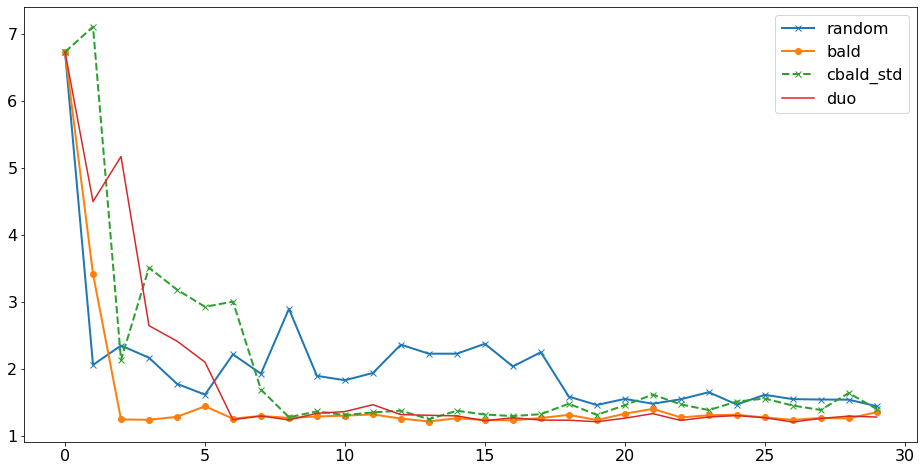

In [67]:
with open('results/cbald_filename.pickle', 'rb') as handle:
    b = pickle.load(handle)
    
for i in range(0, b['mutatu'].shape[0]):
    plt.figure(figsize=(16,8))
    plt.rcParams.update({'font.size': 16})
    plt.plot(b['random'][i],'-x', label='random', linewidth=2)
    plt.plot(b['bald'][i],'-o', label = 'bald', linewidth=2)
    plt.plot(b['cbald'][i],'--x', label = 'cbald_std', linewidth=2)
    plt.plot(b['mutatu'][i], label='duo')
    plt.legend()
    plt.show()

[]

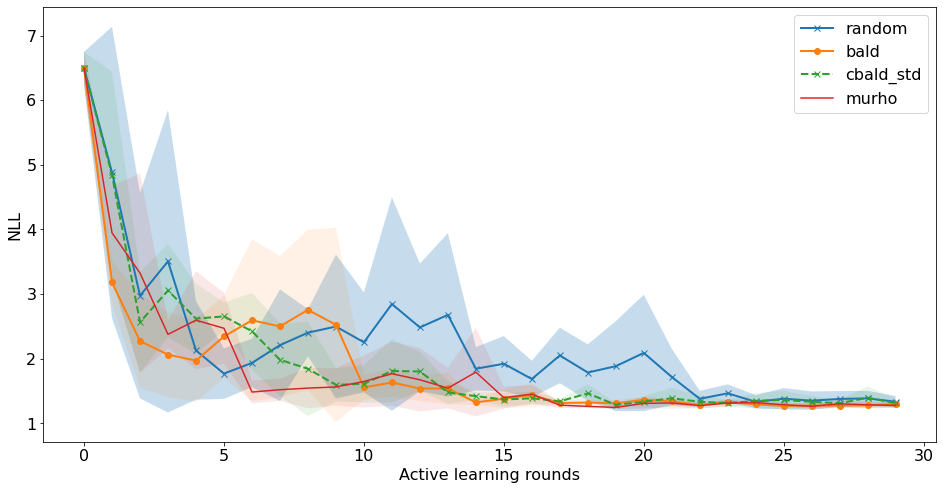

In [68]:
plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size': 16})
plt.plot(np.mean(b['random'], axis=0),'-x', label='random', linewidth=2)
plt.plot(np.mean(b['bald'], axis=0),'-o', label = 'bald', linewidth=2)
plt.plot(np.mean(b['cbald'], axis=0),'--x', label = 'cbald_std', linewidth=2)
plt.plot(np.mean(b['mutatu'], axis=0), label='murho')
#plt.plot(np.mean(b['tau'], axis=0), '--o',label='cbald_mean')


plt.fill_between(np.arange(b['random'].shape[-1]), y1 = np.mean(b['random'], axis=0)-np.std(b['random'], axis=0),
                                                    y2 = np.mean(b['random'], axis=0)+np.std(b['random'], axis=0),alpha=0.25)
plt.fill_between(np.arange(b['bald'].shape[-1]), y1 = np.mean(b['bald'], axis=0)-np.std(b['bald'], axis=0),
                                                    y2 = np.mean(b['bald'], axis=0)+np.std(b['bald'], axis=0),alpha=0.10)
plt.fill_between(np.arange(b['cbald'].shape[-1]), y1 = np.mean(b['cbald'], axis=0)-np.std(b['cbald'], axis=0),
                                                    y2 = np.mean(b['cbald'], axis=0)+np.std(b['cbald'], axis=0),alpha=0.10)
plt.fill_between(np.arange(b['mutatu'].shape[-1]), y1 = np.mean(b['mutatu'], axis=0)-np.std(b['mutatu'], axis=0),
                                                    y2 = np.mean(b['mutatu'], axis=0)+np.std(b['mutatu'], axis=0),alpha=0.10)

#plt.fill_between(np.arange(b['tau'].shape[-1]), y1 = np.mean(b['tau'], axis=0)-np.std(b['tau'], axis=0),
#                                                    y2 = np.mean(b['tau'], axis=0)+np.std(b['tau'], axis=0),alpha=0.25)
#plt.fill_between(np.arange(b['random'].shape[-1]), y1 = np.min(b['random'], axis=0),
#                                                    y2 = np.max(b['random'], axis=0),alpha=0.25)
#plt.fill_between(np.arange(b['bald'].shape[-1]), y1 = np.min(b['bald'], axis=0),
#                                                    y2 = np.max(b['bald'], axis=0),alpha=0.25)
#plt.fill_between(np.arange(b['cbald'].shape[-1]), y1 = np.min(b['cbald'], axis=0),
#                                                    y2 = np.max(b['cbald'], axis=0),alpha=0.25)

#plt.fill_between(np.arange(b['tau'].shape[-1]), y1 = np.min(b['tau'], axis=0),
#                                                    y2 = np.max(b['tau'], axis=0),alpha=0.25)

#plt.plot(np.mean(b['pi'], axis=0), label='pi')
#plt.plot(np.mean(b['mupi'], axis=0), label='mupi')
#plt.plot(np.mean(b['mu'], axis=0), label='mu')
#plt.plot(np.mean(b['murho'], axis=0), label='murho')
#plt.plot(np.mean(b['rho'], axis=0), label='rho')
#plt.plot(np.mean(b['mutatu'], axis=0), label='mtau')
plt.legend(loc='upper right')
#plt.xlim(4,None)
#plt.ylim(2000,None)
plt.xlabel("Active learning rounds")
plt.ylabel("NLL")
plt.plot()#

In [14]:
print(np.sum(np.mean(b['random'], axis=0)))
print(np.sum(np.mean(b['bald'], axis=0)))
print(np.sum(np.mean(b['cbald'], axis=0)))
print(np.sum(np.mean(b['tau'], axis=0)))

156318.06069335935
127294.68123779297
127312.30780639646
157686.81552734374


In [23]:
with open('results/whas_censored_filename.pickle', 'rb') as handle:
    b = pickle.load(handle)

[]

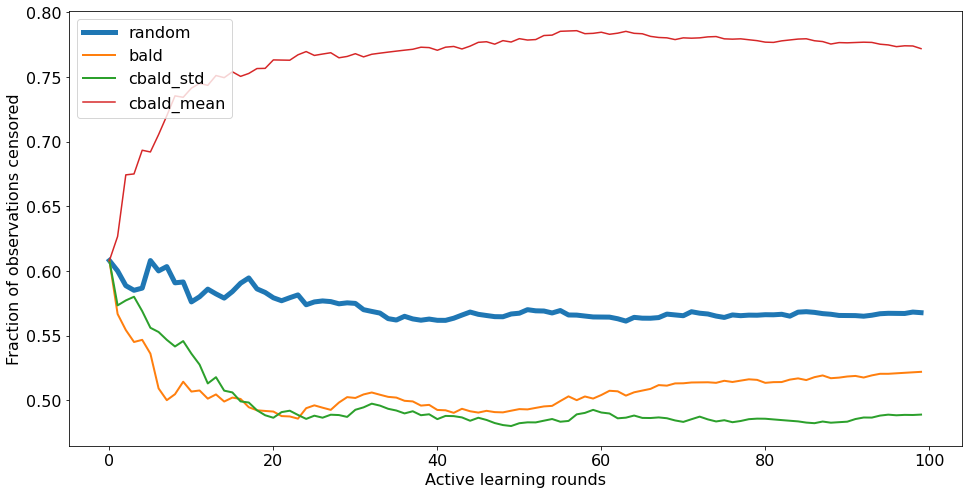

In [24]:
plt.figure(figsize=(16,8))
plt.plot(np.mean(b['random'], axis=0), label='random', linewidth=5)
plt.plot(np.mean(b['bald'], axis=0), label = 'bald', linewidth=2)
plt.plot(np.mean(b['cbald'], axis=0), label = 'cbald_std', linewidth=2)
#plt.plot(np.mean(b['pi'], axis=0), label='pi')
#plt.plot(np.mean(b['mupi'], axis=0), label='mupi')
plt.plot(np.mean(b['tau'], axis=0), label='cbald_mean')
#plt.plot(np.mean(b['mu'], axis=0), label='mu')
#plt.plot(np.mean(b['mutatu'], axis=0), label='murho')
#plt.plot(np.mean(b['rho'], axis=0), label='rho')
#plt.hlines(y=0.33, xmin=0, xmax=25, color='black', label='% of censoring')
#plt.fill_between(np.arange(b['random'].shape[-1]), y1 = np.mean(b['random'], axis=0)-np.std(b['random'], axis=0),
#                                                    y2 = np.mean(b['random'], axis=0)+np.std(b['random'], axis=0),alpha=0.25)
plt.legend(loc='upper left')
#plt.xlim(4,None)
#plt.ylim(2000,None)
plt.xlabel("Active learning rounds")
plt.ylabel("Fraction of observations censored")
plt.plot()